In [1]:
###seguno kpi

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
random_state = 42
from datetime import date
import plotly.graph_objects as go
from plotly import offline as pyoff



from datetime import datetime, date, time, timedelta
import calendar

In [3]:
df=pd.read_csv('C:/Users/evive/Downloads/Nico y Juan/easyMoney/df_banc_rev.csv')

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
import matplotlib.pyplot as plt

sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))



In [6]:
from sklearn.model_selection import train_test_split
# Tamaño del conjunto de entrenamiento
training_size = int(len(df)*0.85)
# Rebalancea los datos en el holdout
y = df["active_customer"]
X = df.drop("active_customer", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                         X,
                                         y,
                                         train_size=training_size,
                                         random_state=42,
                                         shuffle=True,
                                         stratify=y)

In [7]:
# Tamaño del conjunto de entrenamiento
training_size = int(len(df)*0.85)
# Desordena los datos (esto es muy importante).
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
# Copia los datos de test.
df_churn_new = df.iloc[training_size:].copy()
# Copia los datos para el entrenamiento del modelo.
df = df.iloc[:training_size].copy()

In [8]:
print("Proporción True / False del conjunto de entremaniento: ", y_train.value_counts()[1]/y_train.value_counts()[0])
print("Proporción True / False del conjunto de validación: ", y_test.value_counts()[1]/y_test.value_counts()[0])

Proporción True / False del conjunto de entremaniento:  0.6759025500491712
Proporción True / False del conjunto de validación:  0.6759020280155759


In [9]:
df = X_train.copy()
df["active_customer"] = y_train
df_churn_new = X_test.copy()
df_churn_new["active_customer"] = y_test

In [10]:
print("Tamaño del conjunto de datos disponibles: ", len(df))
print("Tamaño del conjunto de nuevos datos: ", len(df_churn_new))

Tamaño del conjunto de datos disponibles:  5063034
Tamaño del conjunto de nuevos datos:  893477


In [11]:
# Lista de funciones aplicadas en el preprocesamiento
churn_data_preprocessing = []

# Características que serán consideradas categóricas y numéricas en el pipeline
cat_features = []
num_features = []

Clases:  [0. 1.]
El porcentaje de muestras positivas es 0.403307


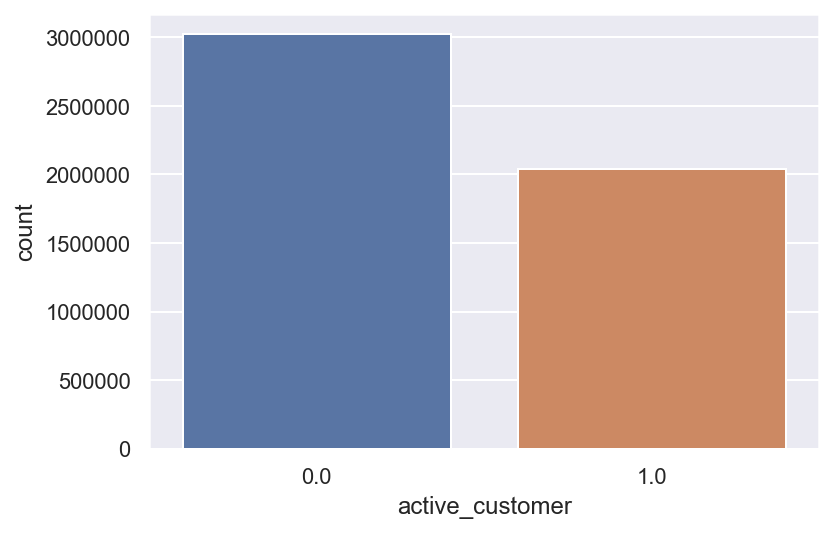

In [12]:
print("Clases: ", df['active_customer'].unique())

#
# COMPLETAR
#
sns.countplot("active_customer", data=df)

print("El porcentaje de muestras positivas es %f" % (sum(df['active_customer']) / df.shape[0]))

In [13]:
def churn_binarize_class(df):
    # COMPLETAR
    df["active_customer"] = df["active_customer"].astype(int)
    return df.T

# Comprueba si la función está bien
display(churn_binarize_class(df.head(10).copy()))

,3433955,1671459,2330431,449058,1801256,3050445,5759279,5554723,1728807,4831296
pk_cid,1274616,1133815,1183698,1035420,1144843,1237450,1498797,1470164,1139533,1383729
pk_partition,2018-08-28,2018-01-28,2019-01-28,2019-02-28,2018-09-28,2019-04-28,2018-12-28,2018-11-28,2018-08-28,2018-12-28
entry_date,2017-07-22,2016-05-13,2016-09-26,2015-07-30,2016-07-22,2017-01-10,2018-11-05,2018-10-06,2016-07-04,2018-02-20
short_term_deposit,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,0,0,0
credit_card,0,0,0,0,0,0,0,0,0,0


In [14]:
df.dtypes

pk_cid                          int64
pk_partition                   object
entry_date                     object
short_term_deposit              int64
loans                           int64
mortgage                        int64
funds                           int64
securities                      int64
long_term_deposit               int64
credit_card                     int64
payroll                       float64
pension_plan                  float64
payroll_account                 int64
emc_account                     int64
debit_card                      int64
em_account_p                    int64
em_acount                       int64
region_code                   float64
gender                          int64
age                             int64
deceased                        int64
salary                        float64
entry_channel_KHE               int64
entry_channel_KFC               int64
entry_channel_KHQ               int64
entry_channel_KAT               int64
entry_channe

In [15]:
numeric_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
cat_df_columns = list(df.select_dtypes(exclude=numeric_types).columns.values) # COMPLETAR
num_df_columns = list(df.select_dtypes(include=numeric_types).columns.values) # COMPLETAR

print('Categóricas: ',cat_df_columns)
print('Numéricas: ',num_df_columns)

Categóricas:  ['pk_partition', 'entry_date']
Numéricas:  ['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD', 'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF', 'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC', 'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE', 'country_id_US', 'country_id_CH', 'country_id_Others', 'em_acount_revenue', 'em_account_p_revenue', 'revenue_emc_account', 'revenue_funds', 'revenue_loans', 'revenue

In [16]:
df["entry_date"] = pd.to_datetime(df["entry_date"], format = "%Y.%m.%d")
df["pk_partition"] = pd.to_datetime(df["pk_partition"], format = "%Y.%m.%d")

In [17]:
print("Imprimiendo el número de valores de cada variable numérica\n-------------------------------------------------")
for column in num_df_columns:
    print(f"Número de valores de {column.upper()}: {len(df[column].value_counts())}")

Imprimiendo el número de valores de cada variable numérica
-------------------------------------------------
Número de valores de PK_CID: 453481
Número de valores de SHORT_TERM_DEPOSIT: 2
Número de valores de LOANS: 2
Número de valores de MORTGAGE: 2
Número de valores de FUNDS: 2
Número de valores de SECURITIES: 2
Número de valores de LONG_TERM_DEPOSIT: 2
Número de valores de CREDIT_CARD: 2
Número de valores de PAYROLL: 2
Número de valores de PENSION_PLAN: 2
Número de valores de PAYROLL_ACCOUNT: 2
Número de valores de EMC_ACCOUNT: 2
Número de valores de DEBIT_CARD: 2
Número de valores de EM_ACCOUNT_P: 2
Número de valores de EM_ACOUNT: 2
Número de valores de REGION_CODE: 52
Número de valores de GENDER: 3
Número de valores de AGE: 104
Número de valores de DECEASED: 2
Número de valores de SALARY: 258424
Número de valores de ENTRY_CHANNEL_KHE: 2
Número de valores de ENTRY_CHANNEL_KFC: 2
Número de valores de ENTRY_CHANNEL_KHQ: 2
Número de valores de ENTRY_CHANNEL_KAT: 2
Número de valores de

In [18]:
df.isnull().sum()

pk_cid                           0
pk_partition                     0
entry_date                       0
short_term_deposit               0
loans                            0
mortgage                         0
funds                            0
securities                       0
long_term_deposit                0
credit_card                      0
payroll                          0
pension_plan                     0
payroll_account                  0
emc_account                      0
debit_card                       0
em_account_p                     0
em_acount                        0
region_code                   1932
gender                           0
age                              0
deceased                         0
salary                           0
entry_channel_KHE                0
entry_channel_KFC                0
entry_channel_KHQ                0
entry_channel_KAT                0
entry_channel_KHK                0
entry_channel_KHM                0
entry_channel_KHN   

In [19]:
df['region_code'].value_counts()

28.00    1006506
8.00      510234
46.00     304011
30.00     252180
41.00     246572
15.00     216385
29.00     159504
36.00     149340
3.00      145096
11.00     136699
33.00     114204
50.00     113186
6.00      104063
35.00     103549
47.00      99561
18.00      87399
45.00      86957
37.00      78740
10.00      70740
14.00      64130
21.00      61320
2.00       61037
13.00      59495
39.00      58922
12.00      58239
7.00       52876
32.00      46333
27.00      44892
43.00      44032
17.00      43105
9.00       40460
25.00      39877
16.00      30641
24.00      29999
48.00      29893
26.00      29563
4.00       27610
31.00      26469
49.00      26269
23.00      26263
38.00      24619
34.00      23481
19.00      22722
40.00      18334
5.00       18124
22.00      17914
20.00      15974
1.00       11027
44.00      10681
42.00       7180
51.00       2452
52.00       2243
Name: region_code, dtype: int64

In [20]:
df['region_code'].fillna('',inplace=True)

In [21]:
num_features.extend(num_df_columns)


print("Numéricas: ",num_features)

Numéricas:  ['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD', 'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF', 'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC', 'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE', 'country_id_US', 'country_id_CH', 'country_id_Others', 'em_acount_revenue', 'em_account_p_revenue', 'revenue_emc_account', 'revenue_funds', 'revenue_loans', 'revenue_long_term_deposit', 'revenue_mortgage', 'rev

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

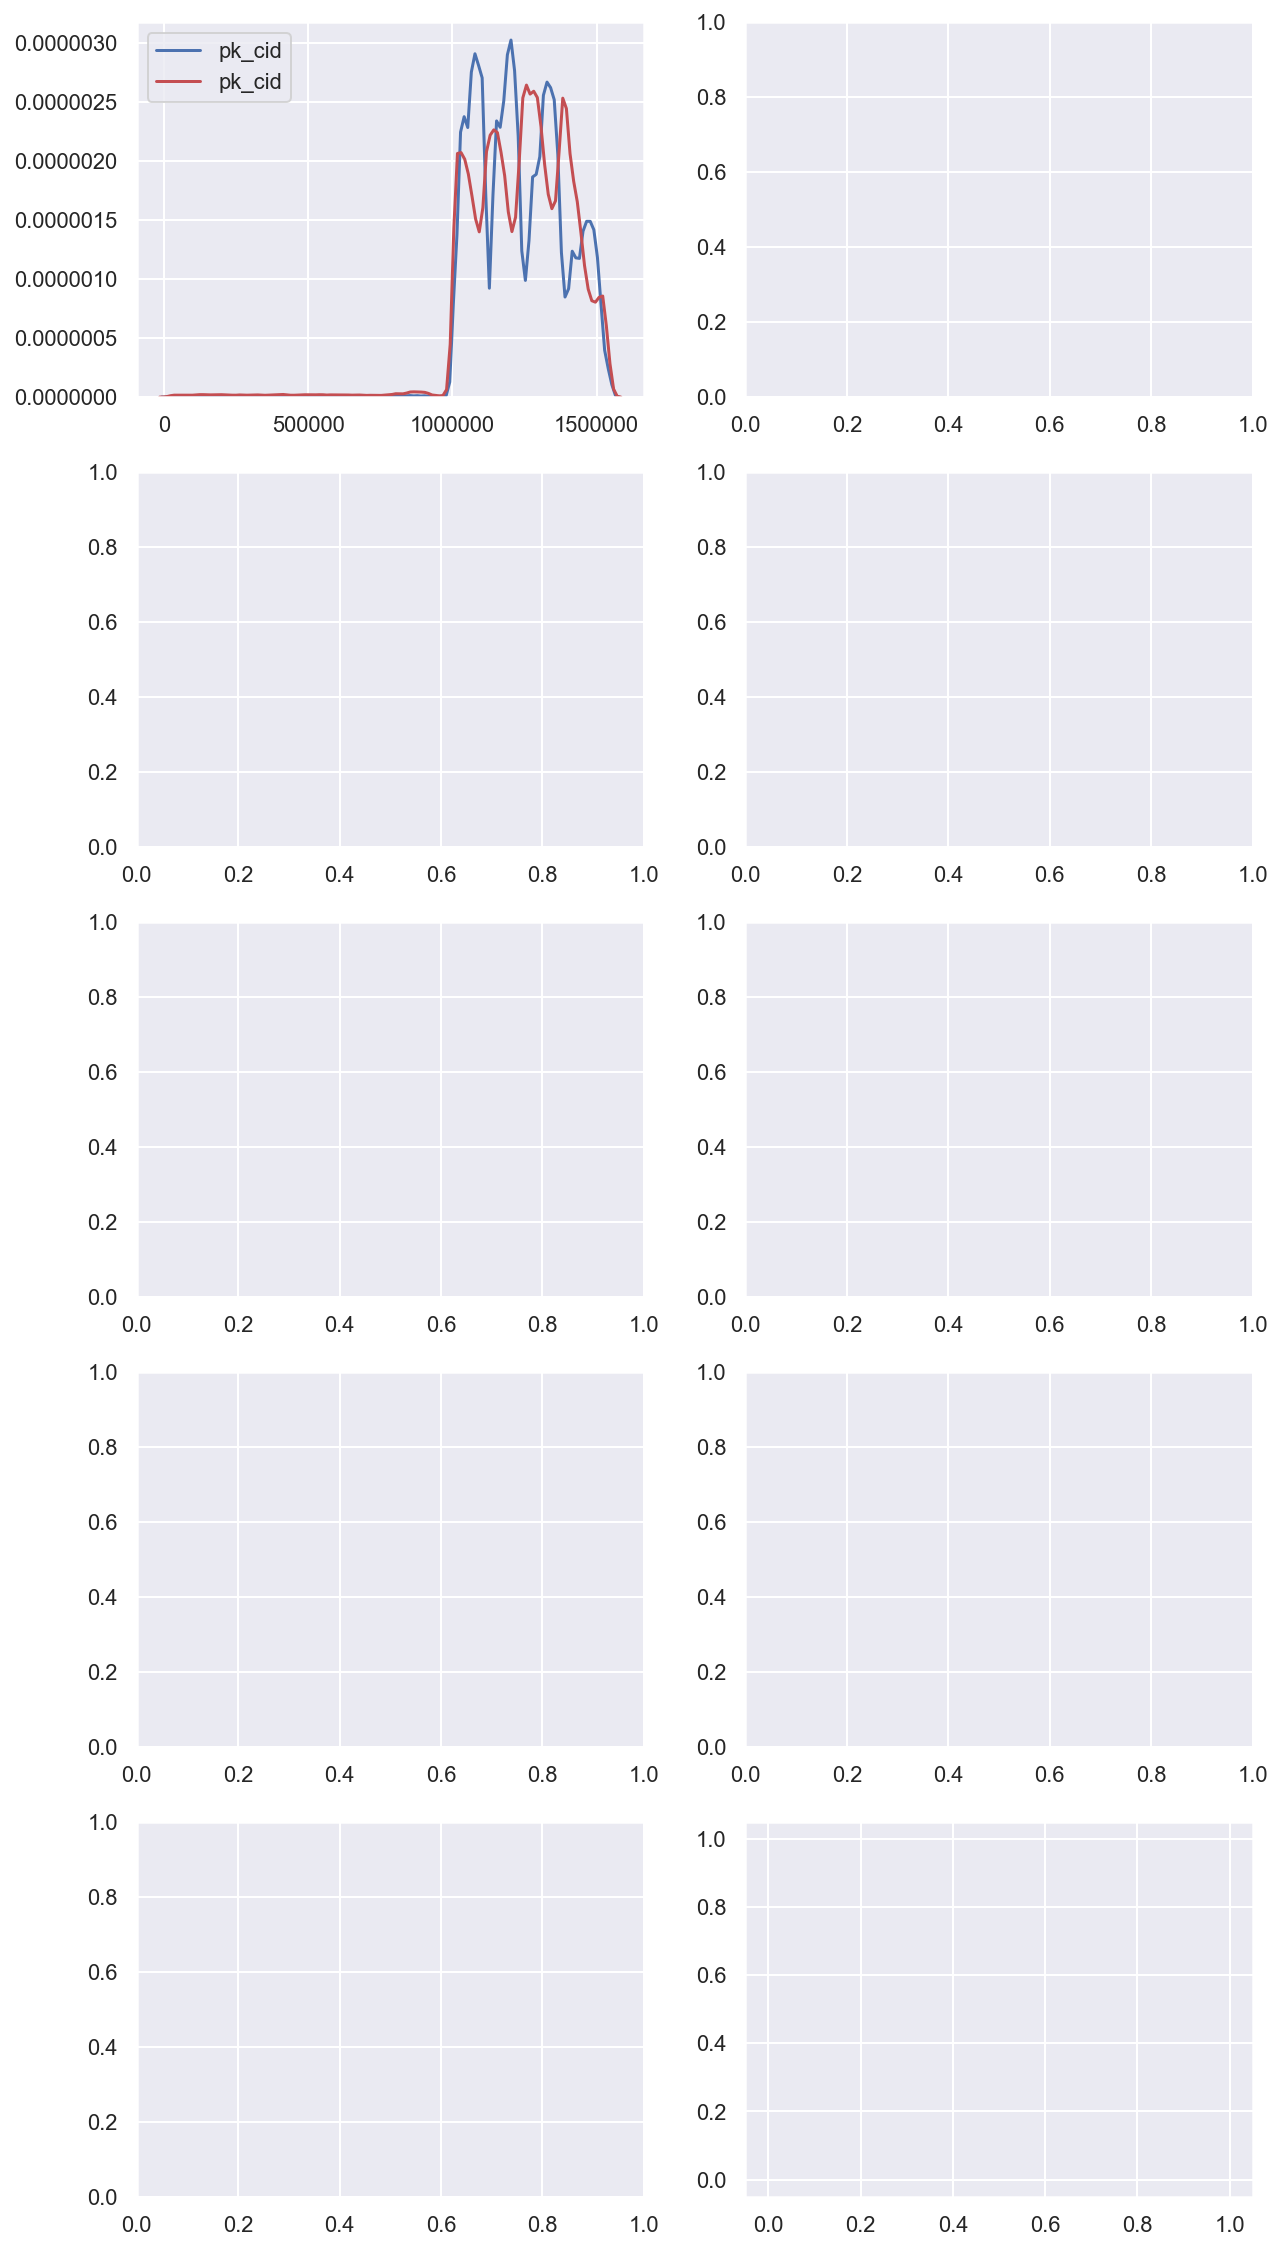

In [25]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

for col, ax in enumerate(axs.flatten()):
    col_name = num_features[col]
    #
    # COMPLETAR
    #
    sns.kdeplot(df[col_name].loc[df.active_customer == 0], ax=ax, color ='b')
    sns.kdeplot(df[col_name].loc[df.active_customer == 1], ax=ax, color ='r')
    plt.plot()

In [ ]:
print("Variables numéricas: ")
print(num_features)
print("\nVariables categóricas")
print(cat_features)

df.head()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_transformer = Pipeline([
    ("preproc_simple_imputer", SimpleImputer(strategy="median")),
    ("preproc_standar_scalar", StandardScaler())
]) # COMPLETAR

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_transformer = Pipeline([
    ("preproc_simple_imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("preproc_one_hot_encoder", OneHotEncoder(handle_unknown="ignore"))
])# COMPLETAR

In [ ]:
from sklearn.compose import ColumnTransformer
churn_trans = ColumnTransformer(transformers=[
                                                ("cat", cat_transformer, cat_features),
                                                ("num", num_transformer, num_features)
                                ])# COMPLETAR

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression();

churn_pipe = Pipeline([
                    ("transformer", churn_trans),
                    ("model", lr_model)
])# COMPLETAR

In [ ]:
churn_features = num_features

In [ ]:
churn_features

In [ ]:
df['active_customer'].value_counts()

In [ ]:
X = df[churn_features]
y = df['active_customer']

# COMPLETAR
churn_pipe = churn_pipe.fit(X, y)
print("Tasa de acierto: %.3f" % churn_pipe.score(X, y))

In [ ]:
print("El porcentaje de muestras negativas es %f" % (sum(df['active_customer'] == 0) / df.shape[0]))

In [ ]:
def preprocess_data(df, churn_data_preprocessing):
    #
    # COMPLETAR
    #
    for func in churn_data_preprocessing:
        df = func(df)
    return df

In [ ]:
df_aux = pd.read_csv('C:/Users/evive/Downloads/Nico y Juan/easyMoney/df_banc_rev.csv').sample(n=5)
preprocess_data(df_aux, churn_data_preprocessing)

In [ ]:
from sklearn.metrics import accuracy_score
# Preprocessing test dataframe
df_churn_new_proc = preprocess_data(df_churn_new, churn_data_preprocessing)

# Separating attributes and the class variable
X_test = df_churn_new_proc[churn_features]
y_test = df_churn_new_proc["active_customer"]

#
#y_pred = churn_pipe.predict(X_test)

print("Tasa de acierto (validación): %.3f" % churn_pipe.score(X_test, y_test) )# accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def show_results(y, y_pred):
    #
    # COMPLETAR
    #
    print(f"Accuracy Score: {accuracy_score(y, y_pred)}")
    print(f"Precision Score: {precision_score(y, y_pred)}")
    print(f"Recall Score: {recall_score(y, y_pred)}")
    print(f"F1 Score: {f1_score(y, y_pred)}")

y_pred = churn_pipe.predict(X)
print("(Train)")
show_results(y, y_pred)
print("-------------------------------------------\n")
print("(Test)")
y_pred = churn_pipe.predict(X_test)
show_results(y_test, y_pred)